# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for data processing
import difflib
import networkx as nx
import matplotlib

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Using df.shape to understand the number of rows and columns 
print( ' The df has', df.shape[0], 'rows and',df.shape[1], 'columns')

 The df has 1898 rows and 9 columns


#### Observations:
1. This given dataset has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Using the df.info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. The initial dataset has 1 float column, 4 columns with integer values and 4 columns with string values
<br> 
2. Each column has 1898 non-null values which preliminary testifies that that there are no missing rows (Still some erroneous data may be present. Additional check is needed)
<br> 
3. As a rating represents a number, it is expected that Dtype of this column should be int or float. However, Rating column is actually an object (i.e. string). It seems that this is because that some ratings are assigned as a string "Not given"*. Therefore, the entire column turns into object (string). Converting to numeric values would be possibly needed. 

 *The check with "df['rating'].unique() confirms" that Not given causes turning the Dtype into object (no other string exist in this column which may cause Dtype be an object for 'rating' column). 
 

In [5]:
# Checking the unique valus of ratings to understand why Dtype has an object type
df['rating'].unique() 

array(['Not given', '5', '3', '4'], dtype=object)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Checking the missing rows
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:

1. df does not have the missing rows. However, if we would consider "Not_given" in the rating column as a missing value then we may change 'Not_given' into NaN values by using following code:

In [7]:
# Replace the Not given by NaN
rating_new=df['rating'].replace(['Not given'],np.nan)

# Change the type from string to float. Otherwise, '5','4' and '3' remain strings
rating_new=rating_new.astype(float)

# Show the rating_new
rating_new

0       NaN
1       NaN
2       5.0
3       3.0
4       4.0
       ... 
1893    5.0
1894    5.0
1895    NaN
1896    5.0
1897    NaN
Name: rating, Length: 1898, dtype: float64

#### Observations:
1. In previous section, df.info() showed that there are no missing rows (all columns have 1898 rows). However, the rating column contains the "Not_given" values which may be considered as missing value (because we cannot understand how the customer evaluates the food received). But not giving the rating (i.e. having a Not_given string) can be also considered as a very relevant data depending on the what question would be posed later. For instance, if later  we would need to evaluate how often customer provides any rating then not_given values surely are not missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Using describe() to get the summary for numerical columns 
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
1. It takes 27 minutes in average to prepare a food. The minimal time is 20 minutes. The maximum is 35 minutes. There are no outliers or unusually-high or low values for food_preparation_time 
<br> 
2. In the table above, there is no much useful information for order_id and customer_id as they represent only id numbers.If an id would bear any semantic sense then probably it would be helpful. But in this particular case, it does not
<br> 
3. There are no outliers or unusually-high or low values for cost_of_the_order
<br> 
4. There are no outliers or unusually-high or low values for ratings (checked with rating_new.describe() ) 
<br> 
5. Similarly, there are no outliers or unusually-high or low values for delivery time

In [9]:
# Checking the statisitcs for ratings (without Not_given values)
rating_new.describe()

count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Checking quantity of each unique rating 
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
1. 736 orders do not have ratings

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [11]:
# Show the variables
print(df.columns)
print('') # empty row between two prints
print('Number of all variables in df is ',len(df.columns))

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

Number of all variables in df is  9


#### Observations:
1. There are 9 variables in the dataframe. Let us explore them all one by one

#### Exploring the order_id

In [12]:
# As order_id does not bear any useful information. Let us simply check if there are any duplicates in the column. 
# Normally, we should not find any duplicates as each order should be unique. So, the number of unique values should be equal to 
# number of rows in dataset 

print('Number of rows in df is', df.shape[0])
print('Number of unique orders is',len(df['order_id'].unique()))

Number of rows in df is 1898
Number of unique orders is 1898


#### Observations:
1. As expected, the number of rows and number of unique orders is the same. Thus, no problems with order id shoul exist 
<br>
2. No distribution is needed as this would be sensless from the analysis point of view

#### Exploring the customer_id

Number of unique customers is 1200
Statistics of orders_per_customer:


count    1200.000000
mean        1.581667
std         1.090560
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: customer_id, dtype: float64

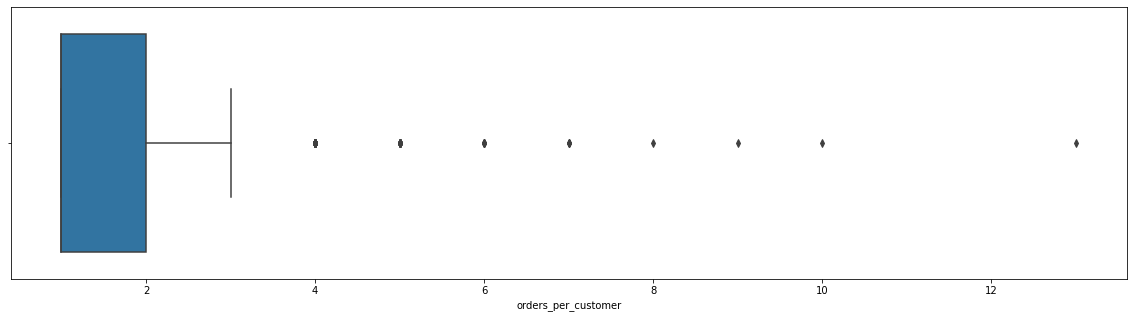

In [13]:
# Let us simply check how many unique customers used FoodHub.  
print('Number of unique customers is', len(df['customer_id'].unique()))

# Let us check how many orders each customer had made
orders_per_customer=df['customer_id'].value_counts()

# Prepare the figure size
plt.figure(figsize=(20,5))
sns.boxplot(data=orders_per_customer,x=orders_per_customer);
plt.xlabel('orders_per_customer');

# Printing the statistics for orders_per_customer
print('Statistics of orders_per_customer:')
orders_per_customer.describe()

#### Observations:
1. Number of FoodHub's unique customers is 1200. As the number of orders is 1898, this means that some customers ordered the food few times. 
<br>
2. In average, a customer does 1.58 orders in FoodHub while median value is only 1 order. This means that at least 50 % of customers (600 users) after ordering once did not return to FoodHub during the covered period of dataset (whose duration is unknown, additional information is needed).If given dataset is for short duration (e.g. week) such numbers would be rather normal (as not many customers may order the food several times). However, if the given datasets represents data for a long duration, then such high number of non-returning customers may be a reason for a conducting a more complex roots analysis and finally the development of the customer retention strategy for FoodHub.  

#### Exploring the restaurant_name

In [14]:
# As restaurant_name represents a series of string, let us check if any dublicates or possibly erroneous names exist.  

# First, let us check if there are any duplicates 

# Find unique names of restaurants  
unique_restaurants_names=sorted(df['restaurant_name'].unique())

# Show the names
unique_restaurants_names

# Create an empty list
saved_similar_names=[]

# Find similar names using get_close_matches()
for each_restaurant in unique_restaurants_names:
    
    # Find a similar names for given restaurant in unique_restaurants_names
    similar_names=difflib.get_close_matches(each_restaurant,unique_restaurants_names)
    
    # Sort in alphabetic order 
    similar_names=sorted(similar_names)
    
    # Save to saved_similar_names
    if len(similar_names)>1:
        saved_similar_names.append(similar_names)
        
# Manual revision of 'saved_similar_names' showed that there are 4 duplciated cases which may represent the same restaurant 
Dublicated_names=[['Dirty Bird To Go (archived)', 'Dirty Bird to Go'],
                  ["Sarabeth's", "Sarabeth's East", "Sarabeth's West"],
                  ['Dos Caminos', 'Dos Caminos Soho'],
                  ["Vanessa's Dumpling House", "Vanessa's Dumplings"],]

# Additional checking of these restaurants on actual Google maps showed that there are indeed several restaurants 
# with similar names in NYC except Dirty Bird To Go.  Dirty Bird To Go has been closed. It seems that no other restaurant 
# with such name exists in NYC. Hence, we deduce that Dirty Bird To Go (archived)=Dirty Bird to Go

# Concerning other restaurants, I assume that the given dataframe represents  reastaurants in various locations but 
# with similar names.So no problems with them in given dataframe and thus nothing should be done further

# Looking at at data for Dirty Bird To Go (archived) and Dirty Bird to Go
df.loc[(df['restaurant_name'] == 'Dirty Bird To Go (archived)') | (df['restaurant_name'] == 'Dirty Bird to Go')]


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
177,1478032,146586,Dirty Bird to Go,American,19.40,Weekend,4,25,19
306,1477312,269793,Dirty Bird To Go (archived),American,8.54,Weekend,Not given,32,30
325,1476848,365401,Dirty Bird To Go (archived),American,15.57,Weekend,Not given,30,24
662,1476955,70001,Dirty Bird to Go,American,12.08,Weekday,Not given,23,32
927,1476720,91958,Dirty Bird To Go (archived),American,12.13,Weekend,4,22,27
1188,1477782,275689,Dirty Bird to Go,American,12.18,Weekday,Not given,20,24


In [15]:
# Changing the name Dirty Bird To Go (archived) into Dirty Bird to Go
df.loc[df['restaurant_name'] == 'Dirty Bird To Go (archived)','restaurant_name']='Dirty Bird to Go';

# Looking again at at data for Dirty Bird To Go (archived) and Dirty Bird to Go
df.loc[(df['restaurant_name'] == 'Dirty Bird To Go (archived)') | (df['restaurant_name'] == 'Dirty Bird to Go')]

# So, the Dirty Bird To Go (archived) was indeed replaced by Dirty Bird to Go

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
177,1478032,146586,Dirty Bird to Go,American,19.40,Weekend,4,25,19
306,1477312,269793,Dirty Bird to Go,American,8.54,Weekend,Not given,32,30
325,1476848,365401,Dirty Bird to Go,American,15.57,Weekend,Not given,30,24
662,1476955,70001,Dirty Bird to Go,American,12.08,Weekday,Not given,23,32
927,1476720,91958,Dirty Bird to Go,American,12.13,Weekend,4,22,27
1188,1477782,275689,Dirty Bird to Go,American,12.18,Weekday,Not given,20,24


In [16]:
# Second, let us check if there are any erroneous names

# Looking at unique names of restaurants
unique_restaurants_names

["'wichcraft",
 '12 Chairs',
 '5 Napkin Burger',
 '67 Burger',
 'Alidoro',
 'Amma',
 "Amy Ruth's",
 'Anjappar Chettinad',
 'Asuka Sushi',
 'Aurora',
 'Balade',
 'Balthazar Boulangerie',
 'Barbounia',
 'Bareburger',
 'Benihana',
 'Bhatti Indian Grill',
 "Big Daddy's",
 'Big Wong Restaurant \x8c_¤¾Ñ¼',
 'Bistango',
 'Blue Ribbon Brooklyn',
 'Blue Ribbon Fried Chicken',
 'Blue Ribbon Sushi',
 'Blue Ribbon Sushi Bar & Grill',
 'Blue Ribbon Sushi Izakaya',
 'Boqueria',
 "Bubby's ",
 'Bukhara Grill',
 'Burger Joint',
 'Byblos Restaurant',
 'Cafe Habana',
 'Cafe Mogador',
 'Cafe de La Esquina',
 'Cafeteria',
 'CafÌ© China',
 "Carmine's",
 'Chipotle Mexican Grill $1.99 Delivery',
 'Cho Dang Gol',
 'Chola Eclectic Indian Cuisine',
 'Chote Nawab',
 'Cipriani Le Specialita',
 "Coppola's East",
 'Crema Restaurante',
 'Delicatessen',
 'DespaÌ±a',
 "Dickson's Farmstand Meats",
 'Dig Inn Seasonal Market',
 'Dirty Bird To Go (archived)',
 'Dirty Bird to Go',
 "Don's Bogam BBQ & Wine Bar",
 'Donburi-ya

#### Observations:
1. No duplicates were found among restaurant names. 
<br>
2.  It seems that Dirty Bird To Go (archived) and Dirty Bird To Go represent the same restaurant. Hence, Dirty Bird To Go (archived) was replaced by Dirty Bird To Go.
<br>
3. Some restaurants may have an erroneous name: 
- Big Wong Restaurant \x8c_¤¾Ñ¼.The word '\x8c_¤¾Ñ¼' should be an error
- Chipotle Mexican Grill $1.99 Delivery. The phrase 1.99 Delivery should be erroneous
- DespaÌ±a. The letters Ì± in the restaurant names should be checked
- Donburi-ya. Should be Donburiya?
- Joe's Shanghai \x8e_À\x8eü£¾÷´. Check the \x8e_À\x8eü£¾÷´
<br>
- Other names may also be incorrect. 

Therefore, it may be neccesary to do a general revision of existing restaurant names 

#### Exploring the cuisine_type

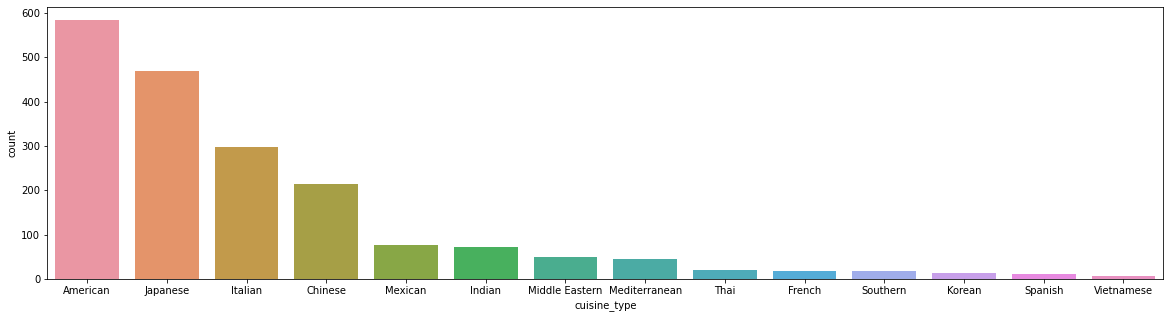

In [17]:
# Checking the number of orders per cuisine_type

# Prepare the figure size
plt.figure(figsize=(20,5))

# Plot a count plot in descending order
sns.countplot(data=df, x='cuisine_type', order = df['cuisine_type'].value_counts().index);

#### Observations:
1. American cuisine is the most ordered in FoodHub 
<br>
2. Vietnamese cuisine has the lowest number of orders
<br>
3. Japanese, Italian and Chinse cuisines are also popular among FoodHub users. (2,3,4 places correspondingly). Second popular group could be Mexican, Indian, MiddleEastern, and Mediterranean cuisines (5,6,7,8 places correspondingly). The third group would be all the rest cuisines: French, Southern, Korean, Spanish and Vietnamese

#### Exploring the cost_of_the_order


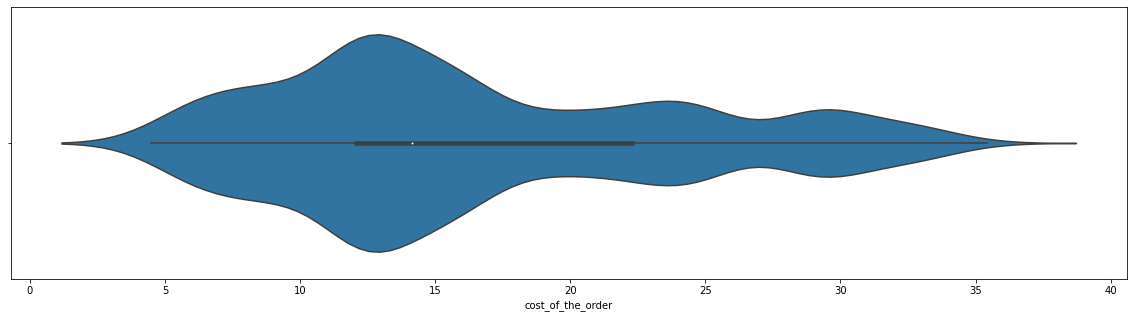

Statistics of cost_of_the_order:
count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64


In [18]:
# Exploring the distribution of cost_of_the_order 

# Prepare the figure size
plt.figure(figsize=(20,5))
sns.violinplot(data=df, x='cost_of_the_order');
plt.show()

# Check the statisctic summury for given violent plot (for information only)
print('Statistics of cost_of_the_order:')
print(df['cost_of_the_order'].describe())

#### Observations:
1. The distribution of costs has 3 peaks. This may testify about the existence of three price categories?

#### Exploring the day_of_the_week


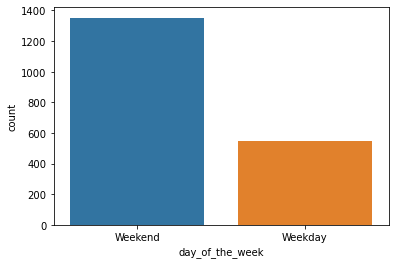

Statistics of day_of_the_week:
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


In [19]:
# Checking the number of orders by day of the week
sns.countplot(data=df, x='day_of_the_week', order = df['day_of_the_week'].value_counts().index);
plt.show()

# Checking the exact numbers
print('Statistics of day_of_the_week:')
print(df["day_of_the_week"].value_counts())

#### Observations:
1. Number of orders during weekends is almost 2.5 times higher than during the weekdays. 

In [20]:
# Checking the total costs by day_of_the_week
print('Total costs in $ by ',df.groupby(by=["day_of_the_week"])['cost_of_the_order'].sum())

print('-----------------------------------------------------------------------------------')

# Checking the mean cost by day_of_the_week
print('Mean cost of order in $ by ',df.groupby(by=["day_of_the_week"])['cost_of_the_order'].mean())

Total costs in $ by  day_of_the_week
Weekday     8922.22
Weekend    22392.60
Name: cost_of_the_order, dtype: float64
-----------------------------------------------------------------------------------
Mean cost of order in $ by  day_of_the_week
Weekday    16.311188
Weekend    16.574833
Name: cost_of_the_order, dtype: float64


#### Observations:
1. Total costs of orders during weekends are also 2.5 times higher than during the weekdays. 
<br>
2.The average order during the weekday is approximatevely the same as during the weekend - 13 $. Thus, it is possible to deduce that there is no difference between the average order during the weekend and weekdays.
<br>
3. From 1 and 2, the difference in total costs between weekdays and weekends is solely caused by number of orders (and not by the value of these orders as the latter is approximatevely the same).

#### Exploring the ratings


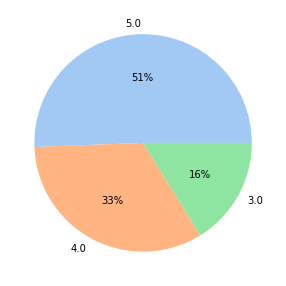

Number of each rating:
 5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

Statistics of ratings:
 count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


In [21]:
# Exploring the distribution of ratings (without Not_given values)

# Prepare the data for pie chart 
pie_data=rating_new.value_counts()

# Define seaborn color palette to use in pie chart
colors = sns.color_palette('pastel')[0:len(pie_data)]

# Prepare the figure size
plt.figure(figsize=(20,5))

#create pie chart
plt.pie(pie_data,labels=pie_data.index, colors=colors, autopct='%.0f%%')
plt.show()

# Printing the corresponding data 
print('Number of each rating:\n', rating_new.value_counts())
print('')
print('Statistics of ratings:\n', rating_new.describe())


#### Observations:
1. 51% of given ratings are equal to 5 and 33% ofgiven ratings are 4. Hence, 84% of orders received good ratings. Only 16% of orders received relatively-low rating. No rating below 3 is presented.

#### Exploring the food_preparation_time


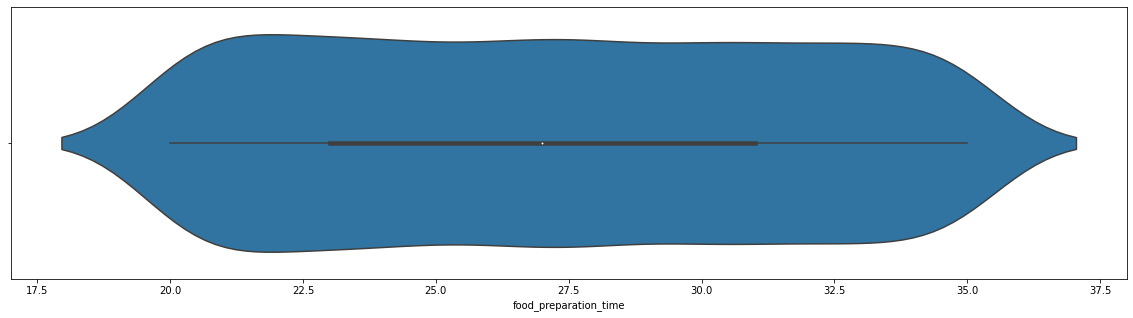

Statistics of food_preparation_time:
 count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


In [22]:
# Prepare the figure size
plt.figure(figsize=(20,5))

# Plot data 
sns.violinplot(data=df, x='food_preparation_time')
plt.show();

print('Statistics of food_preparation_time:\n', df['food_preparation_time'].describe())


#### Observations:
1. In average, 27.37 min are required to prepare a food. Also, 27 min represents a median. 
2. The fastest food preparation takes 20 minutes while the slowest one takes 35 minutes
3. It seems that there is no skewness

#### Exploring the food_preparation_time


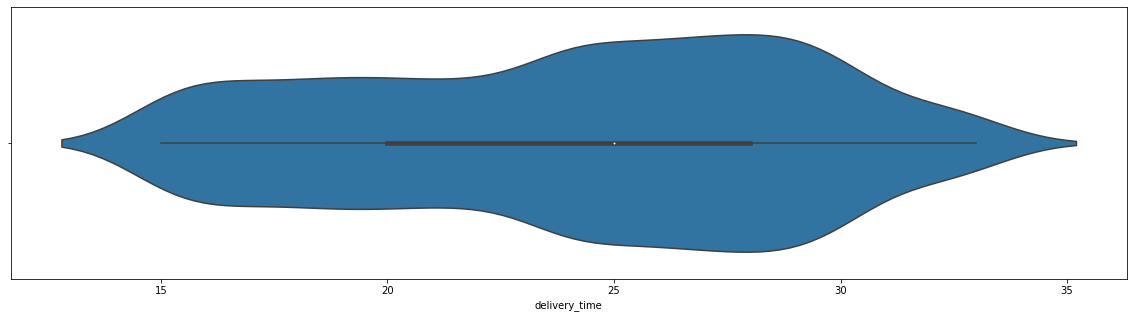

Statistics of delivery_time:
 count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


In [23]:
# Prepare the figure size
plt.figure(figsize=(20,5))

# Plot the delivery time
sns.violinplot(data=df, x='delivery_time')
plt.show();

print('Statistics of delivery_time:\n', df['delivery_time'].describe())


#### Observations:
1. The fastest delivery time is 15 min, the slowest is 33 minuntes. Median delivery time is 25 minutes whereas mean time is almost the same - 24.16 min. 
2. The graph of delivery time is left-skewed 


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

orders_per_restaurant:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Rye House                      1
Hiroko's Place                 1
Frank Restaurant               1
Sarabeth's West                1
'wichcraft                     1
Name: restaurant_name, Length: 177, dtype: int64


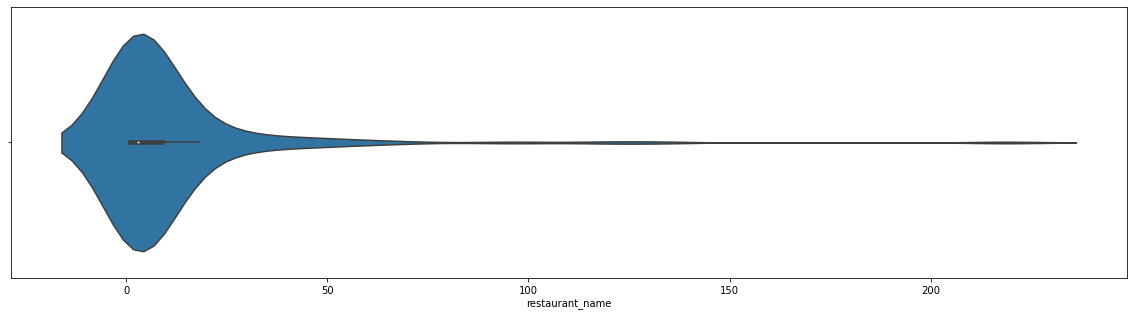

Statistics on orders_per_restaurant:
count    177.000000
mean      10.723164
std       24.104582
min        1.000000
25%        1.000000
50%        3.000000
75%        9.000000
max      219.000000
Name: restaurant_name, dtype: float64


In [24]:
# Checking the number of order per restaurant
orders_per_restaurant=df["restaurant_name"].value_counts().sort_values(ascending=False)

# Print top5 restaurants by orders and top5 from the end
print('orders_per_restaurant:')
print(orders_per_restaurant)


# --------Additional study on general distribution of orders per restaurant-------------
# Prepare the figure size
plt.figure(figsize=(20,5))

# Plot the orders_per_restaurant
sns.violinplot(x=orders_per_restaurant)
plt.show()

print('Statistics on orders_per_restaurant:')
print(orders_per_restaurant.describe())

#### Observations:
1. Top 5 restaurants by orders received:  
<pre>
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
</pre>

2. Additional study: the median value of orders by restaurant is 3 whereas the average value is almost 11. Togather with violinpot, such difference between median and mean values testifies about high (right) skewness of data.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

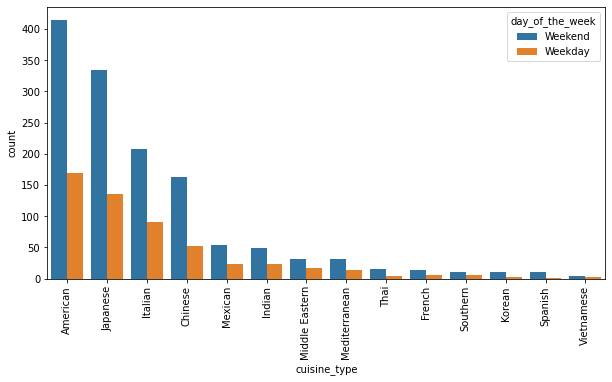

In [25]:
# Prepare a figure size
plt.figure(figsize=(10,5))

# Checking the most popular cuisine for weekends and weekdays (for more general view)
sns.countplot(data=df, x='cuisine_type', order = df['cuisine_type'].value_counts().index, hue='day_of_the_week');

# Rotate the names at x-axis
plt.xticks(rotation=90);

#### Observations:
1. The most popular cuisine on  weekends is American cuisine

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
# Number of rows with order costs more than 20 $ 
rows_higher_20=df[df['cost_of_the_order']>20].shape[0]

# Number of all rows 
all_rows=df.shape[0]

# Calculating the % 
percentage=rows_higher_20/all_rows*100

# Print the results
print('Percentage of the orders that cost more than 20 dollars is',percentage,'%')


Percentage of the orders that cost more than 20 dollars is 29.24130663856691 %


#### Observations:
1. The percentage of the orders cost more than 20 dollars is 29,24 %

### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
# Print the results
print('The mean delivery time is',df['delivery_time'].mean(),'min')

The mean delivery time is 24.161749209694417 min


#### Observations:
1. The mean delivery time is 24 min

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Print the results
print('Top 5 customers by order number:')
print(df["customer_id"].value_counts().head())

print('')
  
print('Top 5 customers by total costs:') 
print(df.groupby(by=["customer_id"])['cost_of_the_order'].sum().sort_values(ascending=False).head())

Top 5 customers by order number:
52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

Top 5 customers by total costs:
customer_id
52832     225.80
250494    183.83
47440     158.18
276192    146.46
83287     139.31
Name: cost_of_the_order, dtype: float64


#### Observations:
1. According to the question, it is neccesary to determine the top 5 most frequent customers. If under frequent, we understand  customers with the highest number of orders then the results would be:
<pre>
customer_id    number of orders
52832          13
47440          10
83287           9
250494          8
259341          7
</pre>

However, it is neccesary to pay attention that if we would consider the costs of orders (instead of  number of orders) then the top 5 customers would be a little bit different:
<pre>
customer_id    costs of orders   
52832          225.80
250494         183.83
47440          158.18
276192         146.46
83287          139.31
</pre>

Due to this issue, some customers in top 5 would change the position and even be replaced. For instance customer 276192 is in top 5 among the customers by costs of orders but not among the top 5 customers by number of orders. The vice versa is for customer 259341.



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


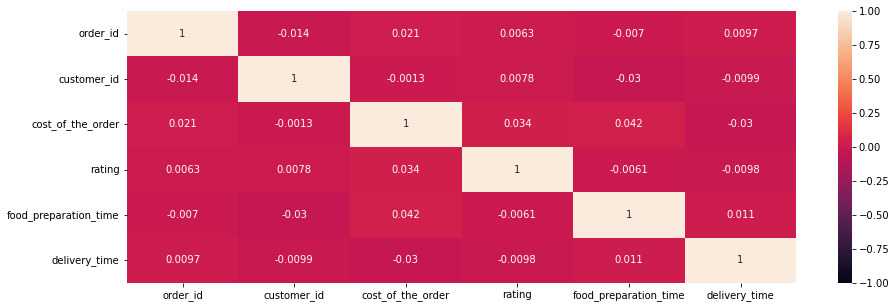

In [29]:
# First, let us check the existance of any correlation between numeric variables

# NB: rating column in original df has a object type (string). Therefore, let us create a copy of df but with rating 
# as float type

# Copy the database 
df_corr=df.copy()

# Change the values in rating column 
df_corr['rating']=rating_new

# Checking the correlation between numeric variables by heatmap
plt.figure(figsize=(15,5))

#  Plot a heatmap
sns.heatmap(df_corr.corr(),
            annot=True,
            vmin=-1,
            vmax=1);

#### Observations:
1. No significant correlation among numeric values was found. Therefore, further analysis between numeric variables is not neccesary. Hence let us focus on relations between numerical and categorical variables

restaurant_name
Shake Shack                   3579.53
The Meatball Shop             2145.21
Blue Ribbon Sushi             1903.95
Blue Ribbon Fried Chicken     1662.29
Parm                          1112.76
                               ...   
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, Length: 177, dtype: float64


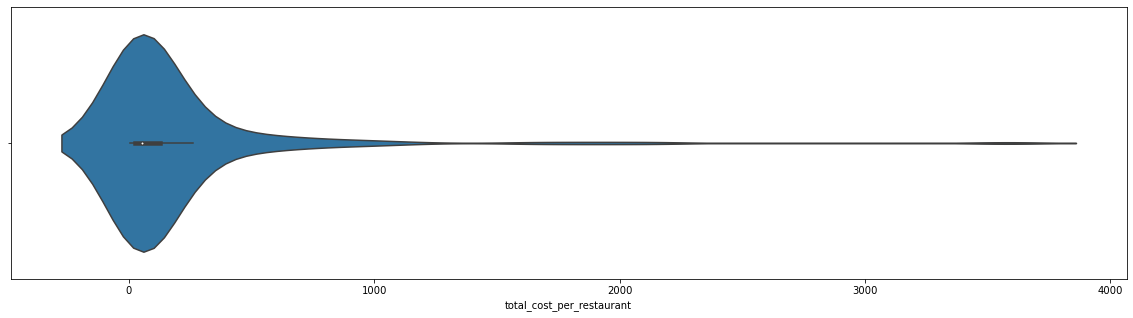

Statistics on total_cost_per_restaurant:
count     177.000000
mean      176.919887
std       395.540735
min         5.720000
25%        23.720000
50%        54.950000
75%       125.100000
max      3579.530000
Name: cost_of_the_order, dtype: float64


In [30]:
# Let us see what are total costs per each restaurant:

# Calculate the total cost per each restaurant and present it in descending order
total_cost_per_restaurant=df.groupby(by=["restaurant_name"])['cost_of_the_order'].sum().sort_values(ascending=False)
print(total_cost_per_restaurant)

# Prepare the figure size
plt.figure(figsize=(20,5))

# Plot the total_cost_per_restaurant
sns.violinplot(x=total_cost_per_restaurant)
plt.xlabel('total_cost_per_restaurant')
plt.show()

# Print the statistics for violinplot
print('Statistics on total_cost_per_restaurant:')
print(total_cost_per_restaurant.describe())

#### Observations:
1. There is large difference between  restaurants in terms of total cost. The restaurant with the higest cost (USD 3579.53)  is Shake Shack whereas Hunan Manor earns only USD 5.72
2. The median total cost is 55 dollars. Again this is much below than costs in top5 restaurants (from 1112 to 3579 dollars). It would be useful to conduct an additional study to understand the roots of such large difference 



Number of all restaurants :  177

Total costs of all restaurants:  31314.82


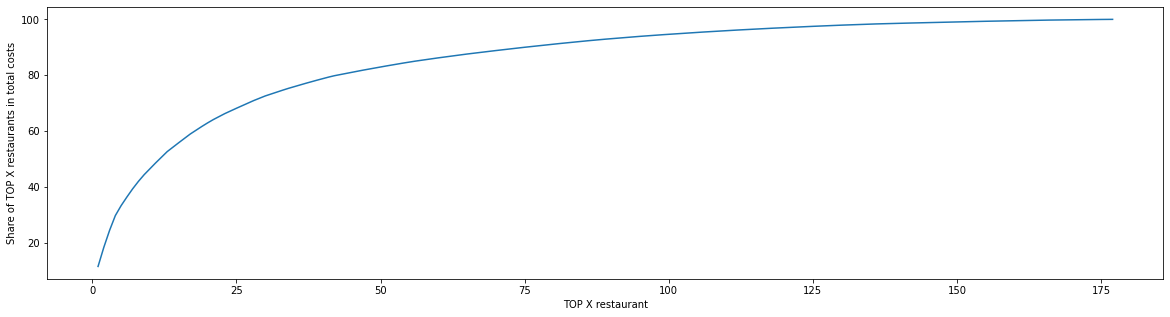

,TOPX,share_of_topX_in_total_costs
0,1,11.430786
1,2,18.281248
2,3,24.361277
3,4,29.669594
4,5,33.223055
5,6,36.305079
6,7,39.246849
7,8,41.911721
8,9,44.323646
9,10,46.452415


In [31]:
# Let us see what is the Y share of the best-performant restaurants (TOPX) in the total costs (sum of all restaurants) 

# Checking the number of restaurants
number_of_restaurants=len(df['restaurant_name'].unique())
print('Number of all restaurants : ',number_of_restaurants)

print('')

# Checking the total sum of costs for all restaurants
total_cost_of_all_restaurants=total_cost_per_restaurant.sum()
print('Total costs of all restaurants: ',total_cost_of_all_restaurants)


# Checking the share of topX restaurants in Total costs of all restaurants
share_of_topX_in_total_costs=[]

for topX in range(1,number_of_restaurants+1):
    total_cost_of_topX=total_cost_per_restaurant.head(topX).sum()
    
    share_of_topX_in_total_costs.append(total_cost_of_topX/total_cost_of_all_restaurants*100)
    
# Prepare the figure size
plt.figure(figsize=(20,5))

# TOP X restautants. For instance top 5 
TOPX=range(1,number_of_restaurants+1)

sns.lineplot(x=TOPX, 
             y=share_of_topX_in_total_costs,
             markers=True);
plt.xlabel('TOP X restaurant')
plt.ylabel('Share of TOP X restaurants in total costs')
plt.show()

# Combine TOPX and share_of_topX_in_total_costs in one dataframe
df_TOPX=pd.DataFrame(data={'TOPX':TOPX,'share_of_topX_in_total_costs':share_of_topX_in_total_costs})

# Show the results for first 15 rows (TOP1 to TOP15)
df_TOPX.head(15)

#### Observations:
1. Shake Shack, the restaurant with the highest total costs of orders,holds 11.43  % share among all restaurants
2. Only 12 restaurants (out of 177) hold 50 % of all costs
3. Only 75 resturants (out of 177) hold almost 90 %  of all costs 

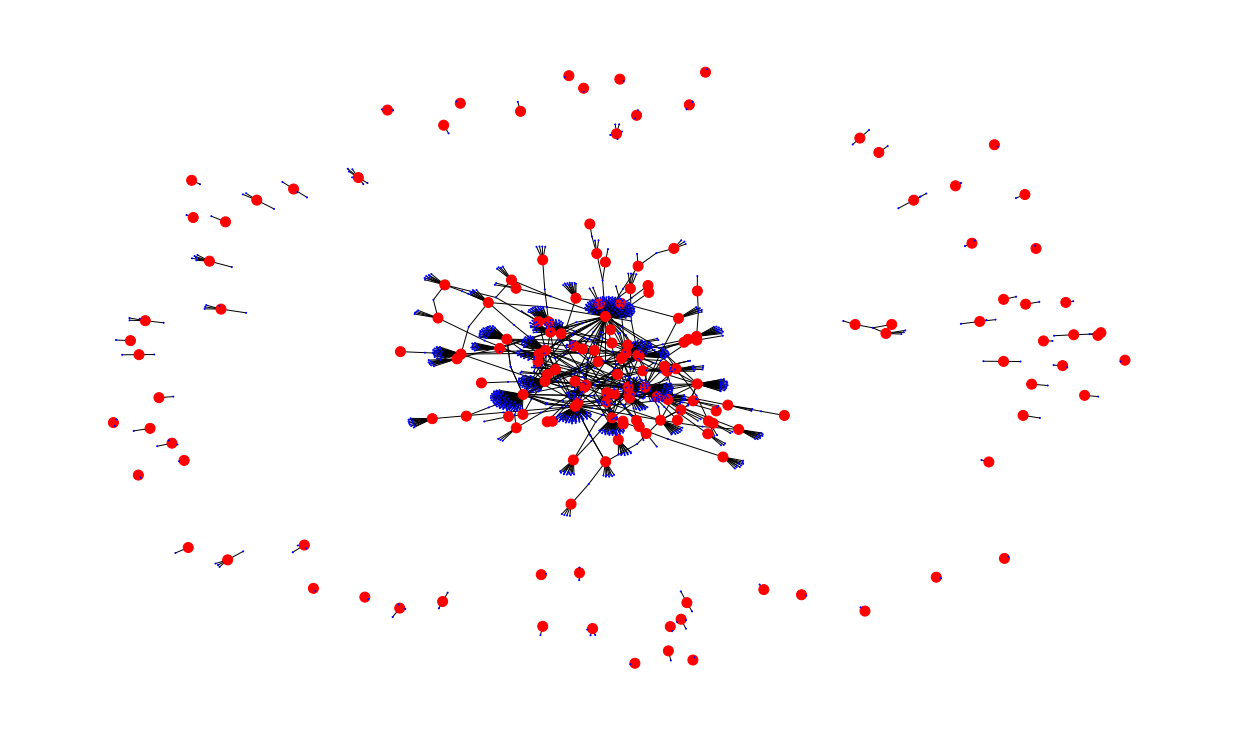

In [32]:
# Create a G graph between restaurants and customers
G=nx.from_pandas_edgelist(df,
                         target='customer_id',
                         source='restaurant_name')

# Set node sizes
node_sizes = [100 if type(entry) !=int else 1 for entry in list(G.nodes())]
node_colors = ['red' if type(entry) !=int else 'blue' for entry in list(G.nodes())]        

# Draw graph
plt.figure(figsize=(17,10))
nx.draw(G, with_labels=False,node_size=node_sizes, node_color=node_colors)
plt.show()


#### Observations:
1. It seems that there are two restaurants types:
    - Restaurants (red dots) of first type are located at outer circle. Such restaurants have few customers who order only in these restaurants
    - Restaurants of second type are located  at the center (with mesh network). Most of the customers order the food in these restaurants. Customer may order only in one restaurant but also in several restaurants. In a such case, blue dot (a customer) will have several links (black edges) with several restaurants (red dots)

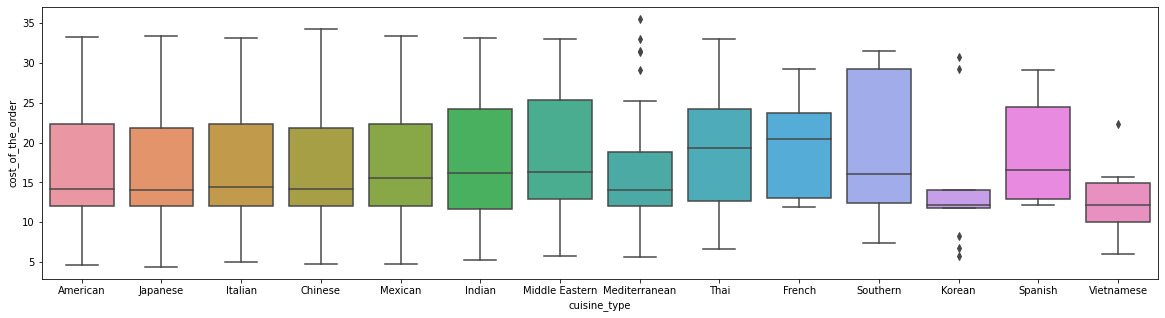

In [33]:
# Checking if there is any cost similarity between the most ordered and less ordered cuisine type.

#  Prepare the figure size
plt.figure(figsize=(20,5))

# Plot cuisine_type versus cost_of_the_order. Sort by the most ordered (on the left) to the less ordered cuisine (on the right)
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order', order = df['cuisine_type'].value_counts().index);

#### Observations:
1. Top4 ordered cuisines (American, Japanese, Italian, Chinese, ) has very similar cost boxplots.  
2. Boxplots for Mexican, Indian and Middle Eastern cuisines also look  similar. 
3. No other similarity exist for other cuisine types

cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Mexican           16.933117
Indian            16.919726
Italian           16.418691
American          16.319829
Chinese           16.305209
Japanese          16.304532
Mediterranean     15.474783
Korean            14.001538
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64


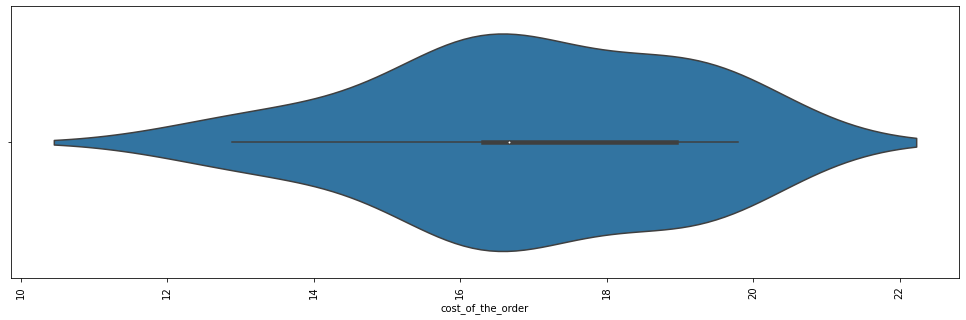

Statistics for mean_cost_per_cuisine_type:
count    14.000000
mean     16.976960
std       2.062542
min      12.882857
25%      16.304701
50%      16.669209
75%      18.950778
max      19.793889
Name: cost_of_the_order, dtype: float64


In [34]:
# Calculate mean_cost_per_cuisine_type and present it in descending order
mean_cost_per_cuisine_type=df.groupby(by=["cuisine_type"])['cost_of_the_order'].mean().sort_values(ascending=False)
print(mean_cost_per_cuisine_type)

#  Prepare the figure size
plt.figure(figsize=(17,5))

# Plot mean_cost_per_cuisine_type
sns.violinplot(x=mean_cost_per_cuisine_type);

# Rotate the names at x-axis
plt.xticks(rotation=90);
plt.show()

# Show the statistics
print('Statistics for mean_cost_per_cuisine_type:')
print(mean_cost_per_cuisine_type.describe())

#### Observations:
1. The cheapest cuisine is vietnamese
2. The most expensive cuisine is french
3. The most ordered cusines, American, Japanese, Italian,Chinese (from previous figure) are close to mean costs 

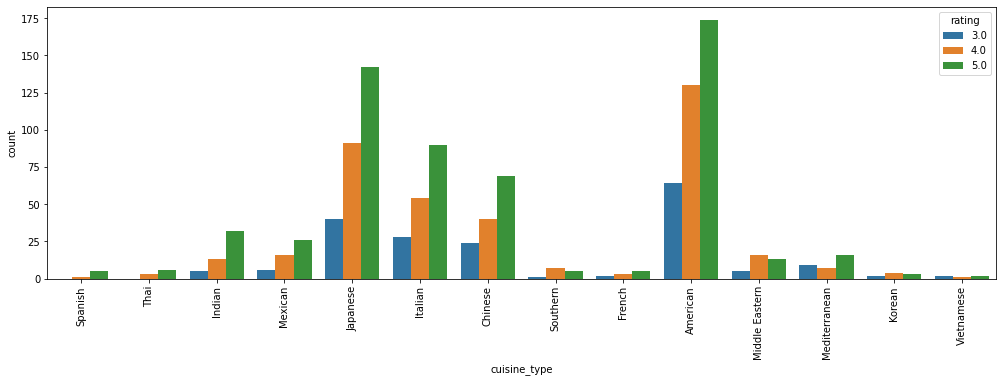

Average rating of cuisine:
cuisine_type
Spanish           4.833333
Thai              4.666667
Indian            4.540000
Mexican           4.416667
Japanese          4.373626
Italian           4.360465
Chinese           4.338346
Southern          4.307692
French            4.300000
American          4.298913
Middle Eastern    4.235294
Mediterranean     4.218750
Korean            4.111111
Vietnamese        4.000000
Name: rating, dtype: float64


In [35]:
# Find the index of rows without rating
index_to_drop = df[df['rating'] == 'Not given'].index

#  Drop the rows without ratings
df_new=df.drop(index_to_drop)

# Convert the remaining rows from object to float
df_new['rating']=df_new['rating'].astype(float)

#  Find the mean rating by cuisine type
cusine_ratings=df_new.groupby(by=["cuisine_type"])['rating'].mean().sort_values(ascending=False)

#  Prepare the figure size
plt.figure(figsize=(17,5))

# Plot number of received ratings per cuisine types (in order from the highest mean rating to the lowest mean rating)
sns.countplot(data=df_new, x='cuisine_type',order = df_new.groupby(by=["cuisine_type"])['rating'].mean().sort_values(ascending=False).index, hue='rating');

# Rotate the names at x-axis
plt.xticks(rotation=90);
plt.show()


# Show the average rating
print('Average rating of cuisine:')
print(cusine_ratings)

#### Observations:
1. All cuisines types have average rating above 4

2. The cuisine types, which are not neccesary the most ordered food, can have the highest average rating. This may be explained by relatively low number of orders which are actually evaluated by few (but seems more loyal) customers 

cuisine_type
Southern          27.588235
Chinese           27.511628
Japanese          27.510638
Italian           27.483221
American          27.440068
Thai              27.315789
Indian            27.109589
Mediterranean     27.000000
Spanish           26.916667
French            26.888889
Mexican           26.727273
Middle Eastern    26.673469
Vietnamese        25.714286
Korean            25.461538
Name: food_preparation_time, dtype: float64


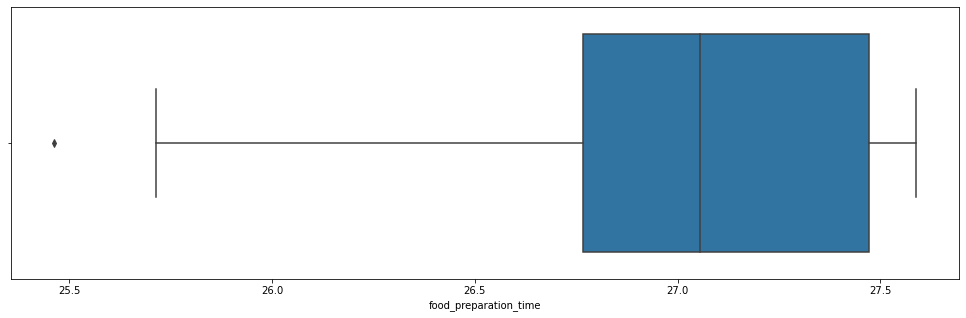

Statistics for cuisine_by_preparation_time:
count    14.000000
mean     26.952949
std       0.656134
min      25.461538
25%      26.767677
50%      27.054795
75%      27.472433
max      27.588235
Name: food_preparation_time, dtype: float64


In [36]:
# Checking the cuisine_type by mean food_preparation_time
cuisine_by_preparation_time=df.groupby(by=["cuisine_type"])['food_preparation_time'].mean().sort_values(ascending=False)
print(cuisine_by_preparation_time)

#  Prepare the figure size
plt.figure(figsize=(17,5))

#  Plot the figure
sns.boxplot(x=cuisine_by_preparation_time);
plt.show()

# Print the statistics
print('Statistics for cuisine_by_preparation_time:')
print(cuisine_by_preparation_time.describe())


#### Observations:
1. There is no drastical difference in mean preparation time between cuisines even if boxplot shows outliers

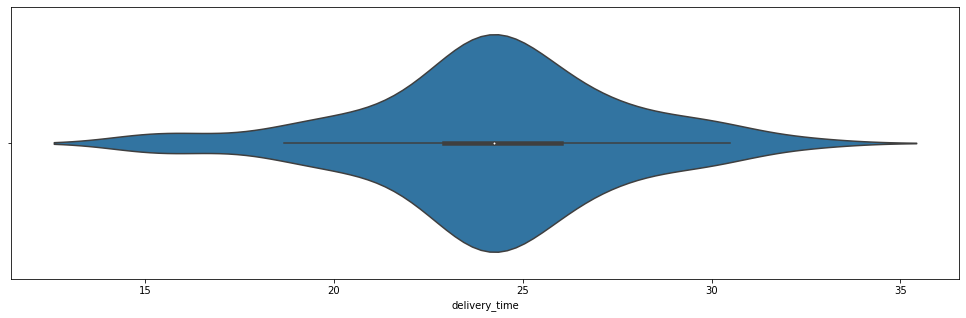

Statistics for delivery_time:
count    177.000000
mean      24.219969
std        3.407856
min       15.000000
25%       22.916667
50%       24.242424
75%       26.000000
max       33.000000
Name: delivery_time, dtype: float64


In [37]:
# Checking the restaurants by mean deleivery time
restaurants_by_delivery_time=df.groupby(by=["restaurant_name"])['delivery_time'].mean().sort_values(ascending=False)

#  Prepare the figure size
plt.figure(figsize=(17,5))

#  Plot the figure
sns.violinplot(x=restaurants_by_delivery_time);
plt.show()

# Print the statistics
print('Statistics for delivery_time:')
print(restaurants_by_delivery_time.describe())


#### Observations:
1. It seems there is a normal distrbution of delivery time. Additional study may be needed to understand the causes 

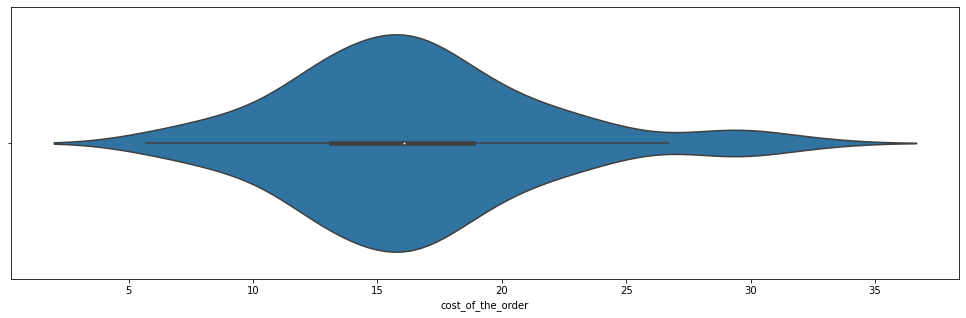

Statistics for restaurant_by_cost_of_the_order:
count    177.000000
mean      16.559093
std        5.239390
min        5.720000
25%       13.120000
50%       16.060000
75%       18.852222
max       32.930000
Name: cost_of_the_order, dtype: float64


In [38]:
# Checking the restaurants by mean cost_of_the_order
restaurant_by_cost_of_the_order=df.groupby(by=["restaurant_name"])['cost_of_the_order'].mean().sort_values(ascending=False)

#  Prepare the figure size
plt.figure(figsize=(17,5))

#  Plot the figure
sns.violinplot(x=restaurant_by_cost_of_the_order);
plt.show()

# Print the statistics
print('Statistics for restaurant_by_cost_of_the_order:')
print(restaurant_by_cost_of_the_order.describe())

#### Observations:
1. It seems there is normal distribution of restaurant_by_cost_of_the_order. Additional study may be required to understand the reasons of it

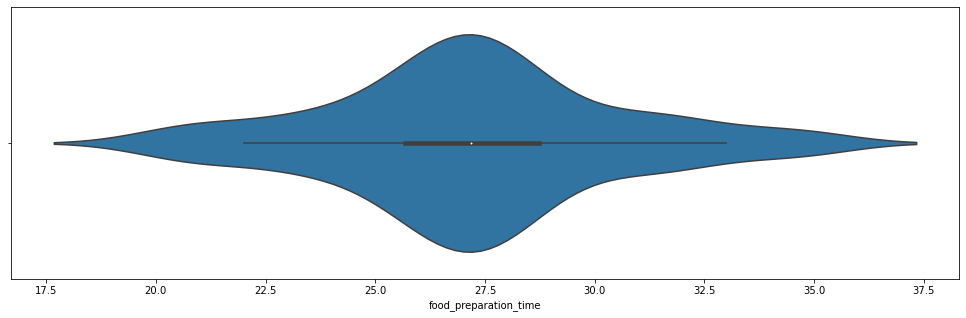

Statistics for restaurant_by_food_preparation_time:
count    177.000000
mean      27.237143
std        3.271198
min       20.000000
25%       25.666667
50%       27.181818
75%       28.724138
max       35.000000
Name: food_preparation_time, dtype: float64


In [39]:
# Checking the restaurants by food_preparation_time
restaurant_by_food_preparation_time=df.groupby(by=["restaurant_name"])['food_preparation_time'].mean().sort_values(ascending=False)


#  Prepare the figure size
plt.figure(figsize=(17,5))

#  Plot the figure
sns.violinplot(x=restaurant_by_food_preparation_time);
plt.show()

# Print the statistics
print('Statistics for restaurant_by_food_preparation_time:')
print(restaurant_by_food_preparation_time.describe())

#### Observations:
1. It seems there is normal distribution of restaurant_by_food_preparation_time. Additional study may be required to understand the reasons of it

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [40]:
# First, it is neccessary to drop the rows without ratings

# Find the index of rows without rating
index_to_drop = df[df['rating'] == 'Not given'].index

#  Drop the rows without ratings
df_new=df.drop(index_to_drop)

# Convert the remaining rows from object to float
df_new['rating']=df_new['rating'].astype(float)

# Calculate the mean ratings per each restaurant
mean_ratings=df_new.groupby(by=["restaurant_name"])['rating'].mean().sort_values(ascending=False)

# Calculate the number of given ratings
number_of_ratings=df_new.groupby(by=["restaurant_name"])['rating'].size().sort_values(ascending=False)

# Create a merged dataframe with mean_ratings and number_of_ratings
merged_df=pd.merge(mean_ratings,number_of_ratings,how='outer',on='restaurant_name')

#  Rename columns 
merged_df.rename(columns={"rating_x": "mean_rating", "rating_y": "number_of_ratings"},inplace=True)

# Find the required restaurants 
targeted_restaurants=merged_df[(merged_df['number_of_ratings']>50)&(merged_df['mean_rating']>4)]

# Show results
targeted_restaurants

,mean_rating,number_of_ratings
restaurant_name,,
The Meatball Shop,4.511905,84
Blue Ribbon Fried Chicken,4.328125,64
Shake Shack,4.278195,133
Blue Ribbon Sushi,4.219178,73


#### Observations:
1. There are 4 restaurants corresponding to given criteria: 

<pre>
restaurant_name            mean_rating   number_of_ratings
The Meatball Shop	          4.511905	  84
Blue Ribbon Fried Chicken	  4.328125	  64
Shake Shack	                4.278195     133
Blue Ribbon Sushi	          4.219178	  73
</pre>



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [41]:
# Find the indexes when cost is greater than 20 dollars 
index_higher_20 = df[df['cost_of_the_order']>20].index

# Find the indexes when cost is between 5 and 20 (including)
index_between_5_and_20 = df[(df['cost_of_the_order']>5)&(df['cost_of_the_order']<=20)].index

# Find the sum of total costs before applying the charges
total_cost_before_charges=df['cost_of_the_order'].sum()

# Apply charges to cost_of_the_order (in the same df)
df.loc[index_higher_20,'cost_of_the_order']=df.loc[index_higher_20,'cost_of_the_order']*0.75
df.loc[index_between_5_and_20,'cost_of_the_order']=df.loc[index_between_5_and_20,'cost_of_the_order']*0.85

# Find the sum of total costs after applying the charges
total_cost_after_charges=df['cost_of_the_order'].sum()

net_revenue=total_cost_before_charges-total_cost_after_charges

# net_revenue=df_new.groupby(by=["restaurant_name"])['cost_of_the_order'].sum().sort_values(ascending=False)
print('net revenue of FoodHub is ', net_revenue,'$')

net revenue of FoodHub is  6166.303 $


#### Observations:
1. Net revenue of FoodHub is  6166.303 $


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [42]:
# total time required to deliver the food
df['Total_time']=df['food_preparation_time']+df['delivery_time']

# Find orders_greater_60min per restaurant
orders_greater_60min=df[df['Total_time']>60]
orders_greater_60min=orders_greater_60min["restaurant_name"].value_counts().to_frame(name="orders_greater_60min")
orders_greater_60min=orders_greater_60min.reset_index()
orders_greater_60min.columns = ['restaurant_name', 'orders_greater_60min'] # change column names

# Find total_orders per restaurant
total_orders=df["restaurant_name"].value_counts().to_frame(name="total_orders")
total_orders=total_orders.reset_index()
total_orders.columns = ['restaurant_name', 'total_orders'] # change column names

# Print percentage of orders take more than 60 minutes to get delivered from the time the order is placed
print('Percentage of orders greater than 60 min relative to all orders:',
      orders_greater_60min['orders_greater_60min'].sum()/total_orders['total_orders'].sum()*100, '%')

# Present results in dataframe
merged_df=pd.merge(orders_greater_60min,total_orders,how='outer',on='restaurant_name').fillna(0)
merged_df['percentage_of_orders_greater_60min']=merged_df['orders_greater_60min']/merged_df['total_orders']*100
merged_df.sort_values(by='total_orders',ascending=False)

Percentage of orders greater than 60 min relative to all orders: 10.537407797681771 %


,restaurant_name,orders_greater_60min,total_orders,percentage_of_orders_greater_60min
0,Shake Shack,26.0,219,11.872146
2,The Meatball Shop,13.0,132,9.848485
1,Blue Ribbon Sushi,19.0,119,15.966387
5,Blue Ribbon Fried Chicken,6.0,96,6.250000
4,Parm,6.0,68,8.823529
...,...,...,...,...
146,Coppola's East,0.0,1,0.000000
147,Emporio,0.0,1,0.000000
148,Wa Jeal,0.0,1,0.000000
149,Le Zie 2000 Trattoria,0.0,1,0.000000


#### Observations:
1. 10.5% of orders (or 177 orders out)  take more than 60 minutes to get delivered from the time the order is placed
2. Additional dataframe was created for further analysis (if needed)

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [43]:
#  Mean delivery time of the orders on weekdays and weekends
mean_delivery_time=df_new.groupby(by=["day_of_the_week"])['delivery_time'].mean().sort_values(ascending=False)
mean_delivery_time

day_of_the_week
Weekday    28.305882
Weekend    22.436740
Name: delivery_time, dtype: float64

#### Observations:
1. The mean time during weekday is 28 min and 22.4 min during the weekends. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  In average, a customer does 1.58 orders in FoodHub while median value is only 1 order. This means that at least 50 % of customers (600 users) after ordering once did not return to FoodHub during the period of dataset (whose duration is unknown => additional information is needed).If given dataset is provided for short duration (e.g. week) such non-returning customers would be rather normal (as not many customers may order the food several times). However, if the given datasets represents non-returning clients for a long duration, then such high share of non-returning customers may enable a conducting a more complex analysis of reasons and finally the development of the customer retention strategy for FoodHub. 

*  Some errors were identified in restaurant names. Therefore, it may be neccesary to do a general revision of existing restaurant names.

*  The most popular cuisine among FoodHub users is American while Vietnamese cuisine remains the less demanded. Japanese, Italian and Chinse cuisines are also popular among FoodHub users. (2,3,4 places correspondingly). Second popular group could be Mexican, Indian, MiddleEastern, and Mediterranean cuisines (5,6,7,8 places correspondingly). The third group would be remaining cuisines: French, Southern, Korean, Spanish and Vietnamese. This ranking corresponds to both weekdays and weekend.

* All cuisines have the average rating above 4. Among all ratings given, 51% are equal to 5 and 33% of given ratings are 4. Hence, 84% of orders received excellent or good evaluation. Only 16% of orders received relatively-low rating. No rating below 3 is presented.(Additional study should be probably done to better understand the reasons of relatively-low ratings).

*  Most of the orders are done during the weekends- 1351 versus 547 during weekdays. Weekend orders, in terms of number, are 2.5 times higher than those during the weekdays. At the same time, the average cost of order during the weekend is the same as during weekdays - 13 USD. As a result, the total costs of orders during the weekday is USD 8922.22 whereas for weekends is 2.5 times higher USD 22392.60. The difference in total costs between weekdays and weekends is solely caused by number of orders (and not by the costs of these orders as the latter is approximatevely the same).

*   As distribution plot of cost_of_the_order showed three peaks, it may be possible that there are 3 price categories. (Additional study should be probably done to better understand it). The cheapest cuisine is vietnamese while the most expensive cuisine is french. The most ordered cusines, American, Japanese, Italian,Chinese are close to mean costs among all cuisines

*   The preparation of food takes 27.37 min in average. Also, 27 min represents a median. The fastest food preparation takes 20 minutes while the slowest one takes 35 minutes. There is no significant difference between cuisines types in terms of mean food preparation time. 

*   In average, the food is delived for 24 minutes while the fastest delivery was 15 min and the the slowest is 33 minuntes. 

*   Concenring the discount vouchers to the top 5 most frequent customers, it may be neccesary to reconsider the list of customers. Depending on the understanding of "frequent", the top 5 list may change. For instance customer 276192 is in top 5 among the customers by costs of orders but not among the top 5 customers by number of orders. The vice versa is for customer 259341

*  No significant correlation among numeric values of df was found. Therefore, the analysis between numeric variables was not neccesary.

* There is large difference between  restaurants in terms of total earnings. For isntance, the restaurant with the higest cost (USD 3579.53)  is Shake Shack whereas Hunan Manor earns only USD 5.72. The median total cost is 55 dollars. Again this is much below than costs in top5 restaurants (from 1112 to 3579 dollars). It would be useful to conduct an additional study to understand the roots of such large difference 

* Companies have various shares in FoodHub marketplace. For instance, the  Shake Shack, the restaurant with the highest total costs of orders,holds 11.43 % share among all restaurants. Special attention should be paid to top groups of restaurants as they generate the main revenue at FoodHub. For instance, only 12 restaurants (out of 177) hold 50 % of all costs. Only 75 resturants (out of 177) hold almost 90 % of all costs. 

*  Two groups customer-restaurant relation were identified. Restaurants  of first type have few customers who order only in these restaurants. Restaurants of second type represent places where majority of the customers order the food. At the same time, customer of such restaurants may order the food as only in one restaurant but also in several restaurants. The network graph was constructed to show each relation for further analysis. 

* Preliminarly, it was shown that Top4 ordered cuisines (American, Japanese, Italian, Chinese, ) has very similar cost distrbutions.  Cost distrbution for Mexican, Indian and Middle Eastern cuisines also look  similar.  It seems that no  similarity in cost distrbution exists for other cuisine types

*  All given questions were responded. 

### Recommendations:

*  Additional study for understanding why at least 50 % of customers ordered only once may be conducted to develop later the customer retention strategy for FoodHub.
* Restaurant names in database should be verified and clear the errors. 
* Additional study should be probably done to better understand the reasons of 16 % relatively-low ratings
* Additional study should be probably done to better understand if there is a casuality between price and orders (as the most ordered cuisines correspond to the mean prices)
* It would be useful to conduct an additional study to understand the roots of  large difference between top restaurants and less-performant restaurants on the FoodHub as only 12 restaurants (out of 177) hold 50 % of all costs
* It may be useful to study the relation between customer and restaurants (see network graph) for better targeting both groups. 


---